In [3]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import shap

c:\Users\bekta\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [8]:
##### 1. Eksik Veri ve 0 Değer Analizi #####
zero_cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
data[zero_cols] = data[zero_cols].replace(0, np.nan)
data.fillna(data.median(), inplace=True)

In [9]:
##### 2. Aykırı Değer Analizi ve Düzeltme #####
def aykiri_duzelt(data, kolon):
    Q1 = data[kolon].quantile(0.25)
    Q3 = data[kolon].quantile(0.75)
    IQR = Q3 - Q1
    alt_sinir = Q1 - 1.5 * IQR
    ust_sinir = Q3 + 1.5 * IQR
    data.loc[data[kolon] < alt_sinir, kolon] = alt_sinir
    data.loc[data[kolon] > ust_sinir, kolon] = ust_sinir


In [10]:
for col in data.columns[:-1]:
    aykiri_duzelt(data, col)

C:\Users\bekta\AppData\Local\Temp\ipykernel_23888\2765296132.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-6.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[kolon] < alt_sinir, kolon] = alt_sinir
C:\Users\bekta\AppData\Local\Temp\ipykernel_23888\2765296132.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '-1.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[data[kolon] < alt_sinir, kolon] = alt_sinir


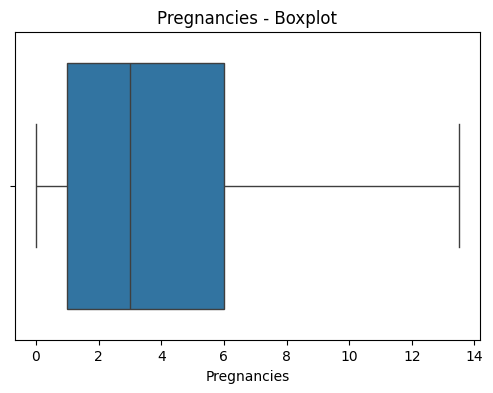

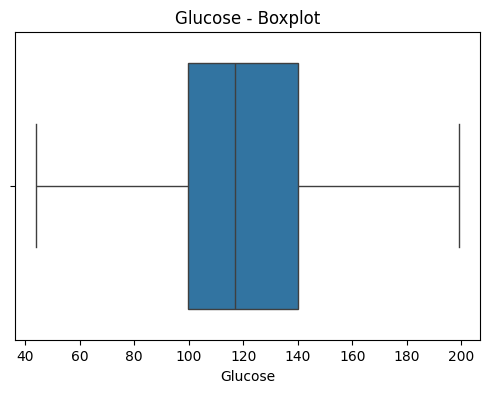

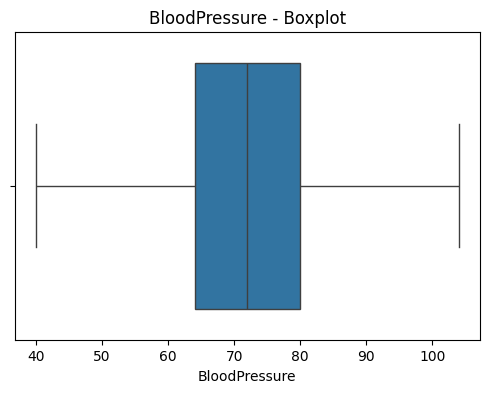

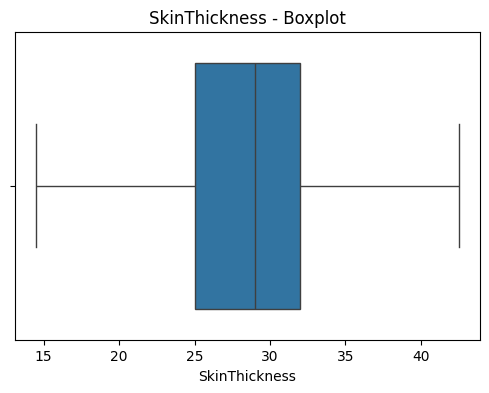

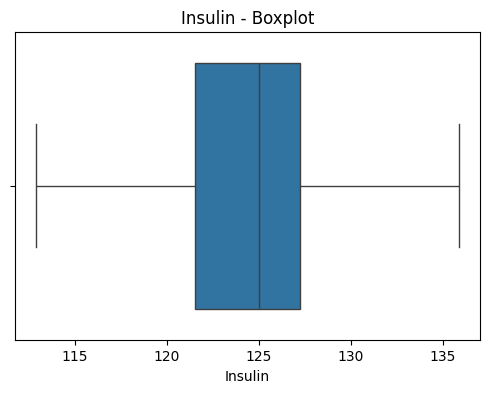

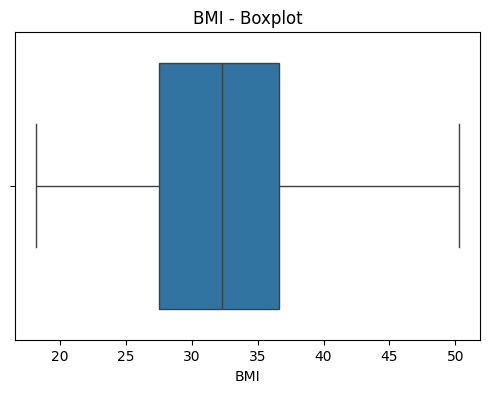

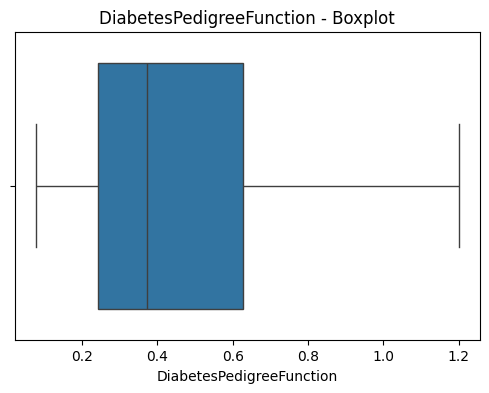

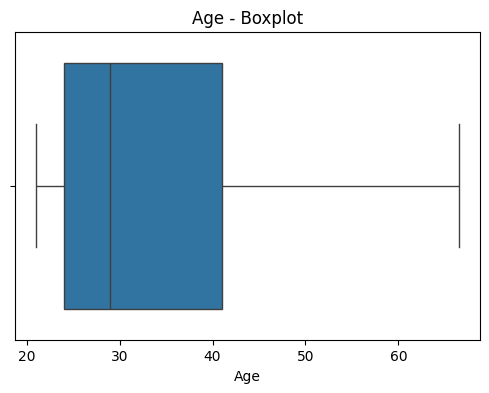

In [11]:
##### Boxplot Gösterme Fonksiyonu #####
def boxplot_goster(data, kolon):
    plt.figure(figsize=(6,4))
    sns.boxplot(x=data[kolon])
    plt.title(f"{kolon} - Boxplot")
    plt.show()

for col in data.columns[:-1]:
    aykiri_duzelt(data, col)
    boxplot_goster(data, col)

In [12]:
##### 3. Ölçekleme #####
scaler = MinMaxScaler()
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_scaled = scaler.fit_transform(X)
X_scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

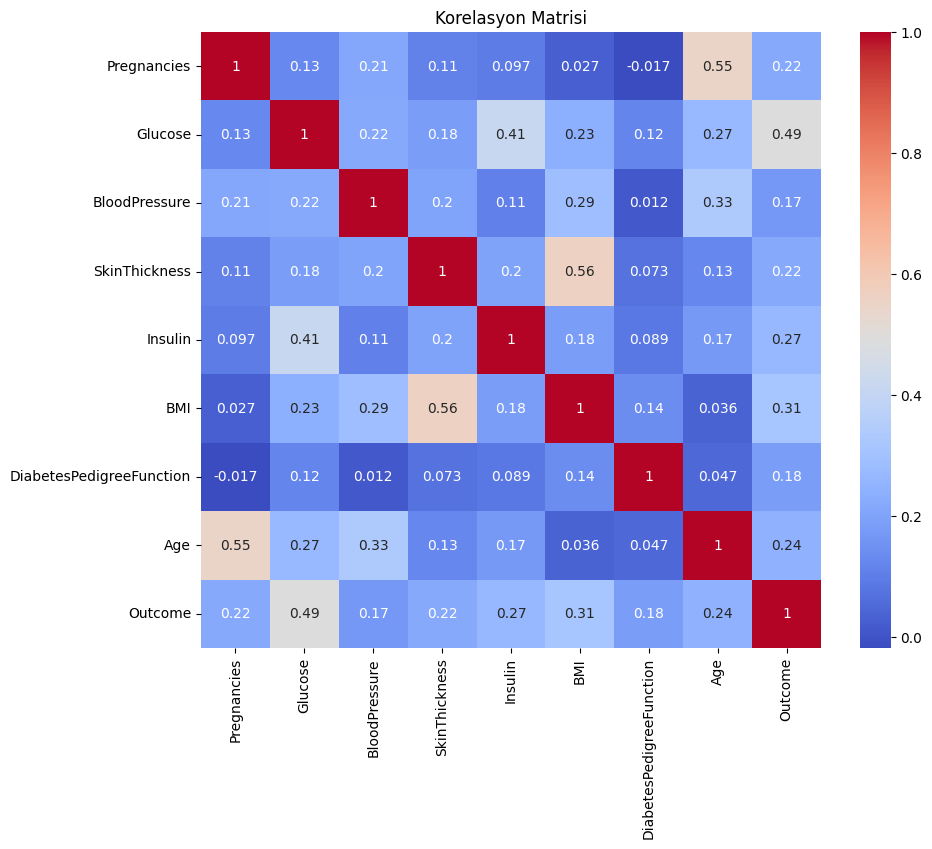

In [13]:
##### 3. Korelasyon Analizi #####
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Korelasyon Matrisi")
plt.show()

In [14]:
##### 4. SMOTE ile Dengeleme #####
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled_data, y)

In [15]:
##### 5. Eğitim Test Ayrımı #####
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [16]:
##### 6. Modellerin Eğitilmesi #####
models = {
    "Logistic Regression": LogisticRegression(max_iter=500),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_prob)
    print(f"\n{name} Sonuçları")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print(f"ROC AUC: {auc:.4f}")
    results[name] = (model, y_test, y_pred, y_prob)


Logistic Regression Sonuçları
[[72 27]
 [22 79]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        99
           1       0.75      0.78      0.76       101

    accuracy                           0.76       200
   macro avg       0.76      0.75      0.75       200
weighted avg       0.76      0.76      0.75       200

ROC AUC: 0.8328

Random Forest Sonuçları
[[74 25]
 [14 87]]
              precision    recall  f1-score   support

           0       0.84      0.75      0.79        99
           1       0.78      0.86      0.82       101

    accuracy                           0.81       200
   macro avg       0.81      0.80      0.80       200
weighted avg       0.81      0.81      0.80       200

ROC AUC: 0.8818

XGBoost Sonuçları
[[71 28]
 [19 82]]
              precision    recall  f1-score   support

           0       0.79      0.72      0.75        99
           1       0.75      0.81      0.78       101

    accuracy      

c:\Users\bekta\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [19:50:38] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


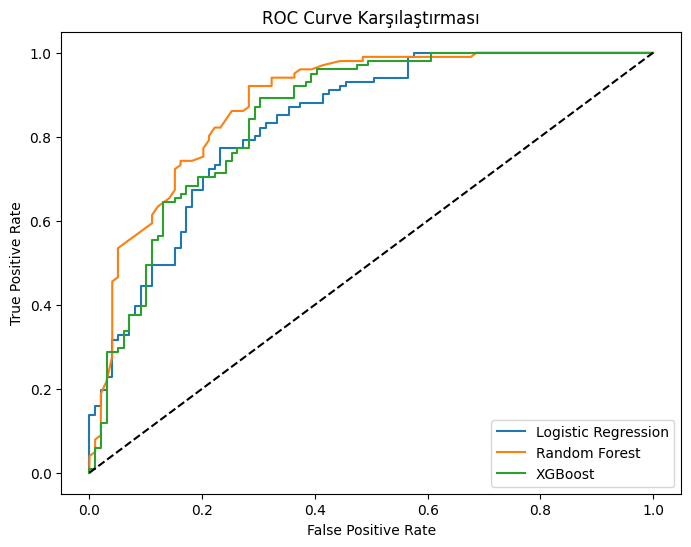

In [17]:
##### 7. ROC Curve Görselleştirme #####
plt.figure(figsize=(8,6))
for name, (model, y_test, _, y_prob) in results.items():
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"{name}")
plt.plot([0,1],[0,1],'k--')
plt.title("ROC Curve Karşılaştırması")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

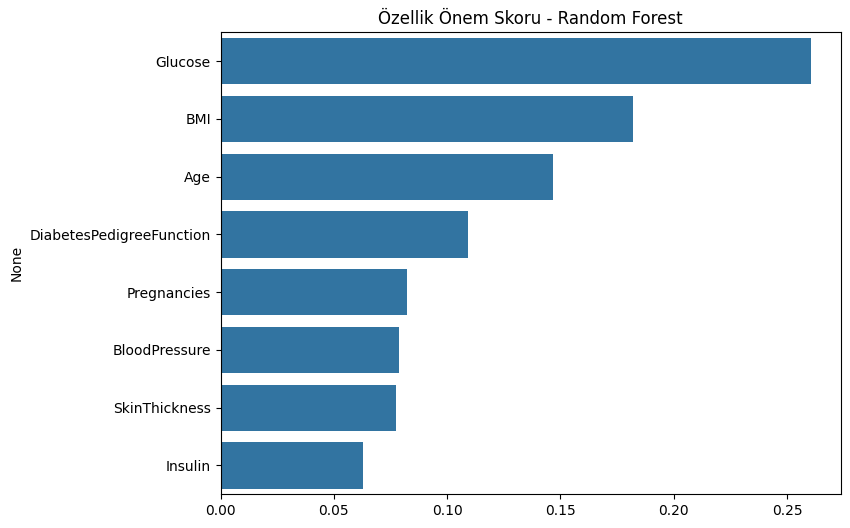

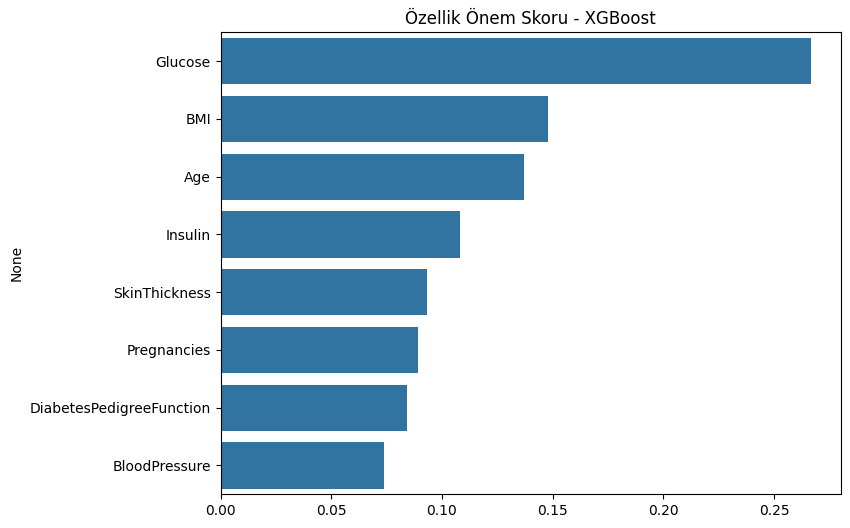

In [18]:
##### 8. Feature Importance Görselleştirme #####
def feature_importance(model, X_train, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    plt.figure(figsize=(8,6))
    sns.barplot(x=importances[indices], y=X_train.columns[indices])
    plt.title(f"Özellik Önem Skoru - {title}")
    plt.show()

feature_importance(results["Random Forest"][0], X_train, "Random Forest")
feature_importance(results["XGBoost"][0], X_train, "XGBoost")


In [19]:
##### 9. SHAP ile Model Yorumlama #####
explainer = shap.TreeExplainer(results["XGBoost"][0])
shap_values = explainer.shap_values(X_train)

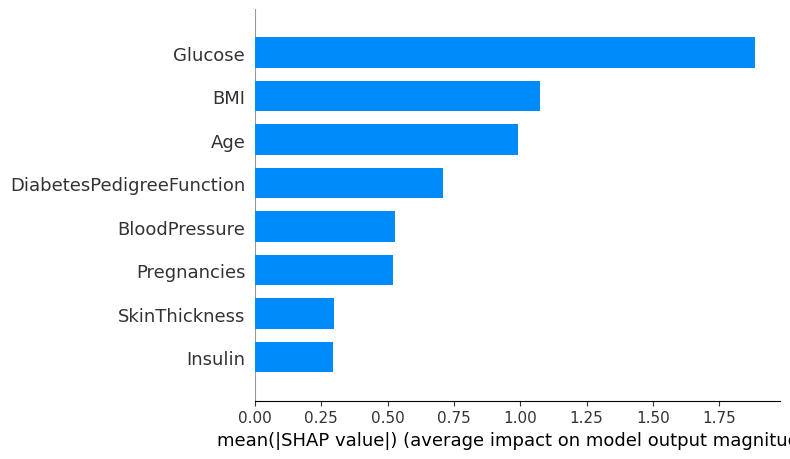

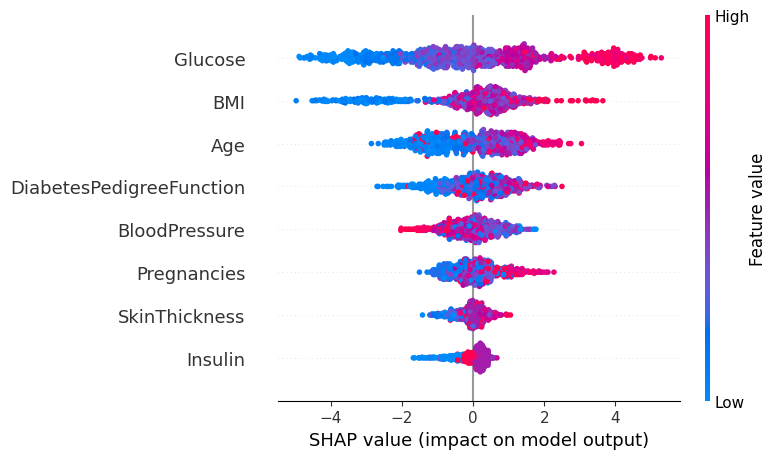

In [20]:
# Özet Grafiği
shap.summary_plot(shap_values, X_train, plot_type="bar")
shap.summary_plot(shap_values, X_train)

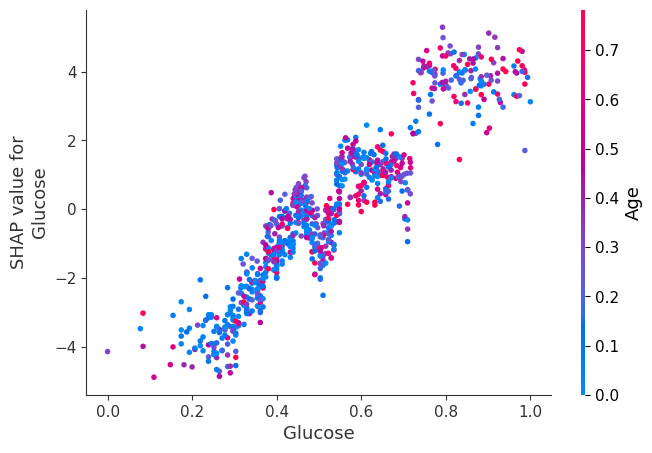

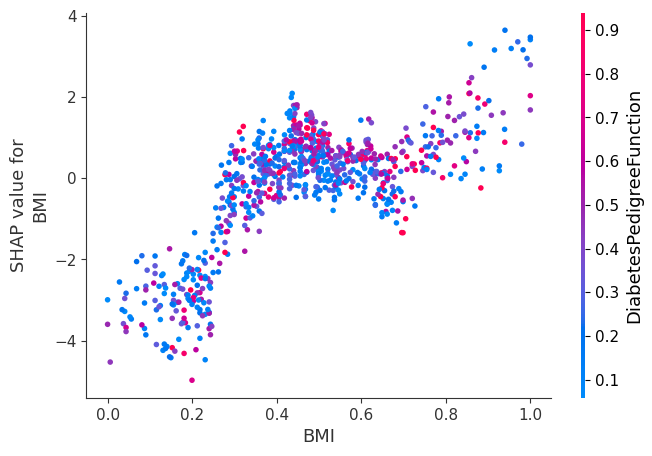

In [21]:
# Dependence Plot Örnekleri
shap.dependence_plot("Glucose", shap_values, X_train)
shap.dependence_plot("BMI", shap_values, X_train)